# Multiple Linear Regression

Multiple Linear Regression is basically indicating that we will be having many features Such as f1, f2, f3, f4, and our output feature f5. Suppose:

f1 is the size of the house.

f2 is bad rooms in the house.

f3 is the locality of the house.

f4 is the condition of the house and,

f5 is our output feature which is the price of the house.

Now, you can see that multiple independent features also make a huge impact on the price of the house, price can vary from feature to feature. When we are discussing multiple linear regression then the equation of simple linear regression y=A+Bx is converted to something like:

equation:  y = A+B1x1+B2x2+B3x3+B4x4

“If we have one dependent feature and multiple independent features then basically call it a multiple linear regression.”

Now, our aim to using the multiple linear regression is that we have to compute A which is an intercept, and B1  B2  B3  B4 which are the slops or coefficient concerning this independent feature, that basically indicates that if we increase the value of x1 by 1 unit then B1 says that how much value it will affect int he price of the house, and this was similar concerning others B2 B3 B4

So, this is a small theoretical description of multiple linear regression now we will use the scikit learn linear regression library to solve the multiple linear regression problem.

Now, we apply multiple linear regression on the 50_startups dataset

## Imports and load data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
# Drop the unused coulmns, we'll be using R&D spend and Marketing spend only
X = X.drop(['Administration','State'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9474386447268488

In [ ]:
coefs = regressor.coef_
intercept = regressor.intercept_

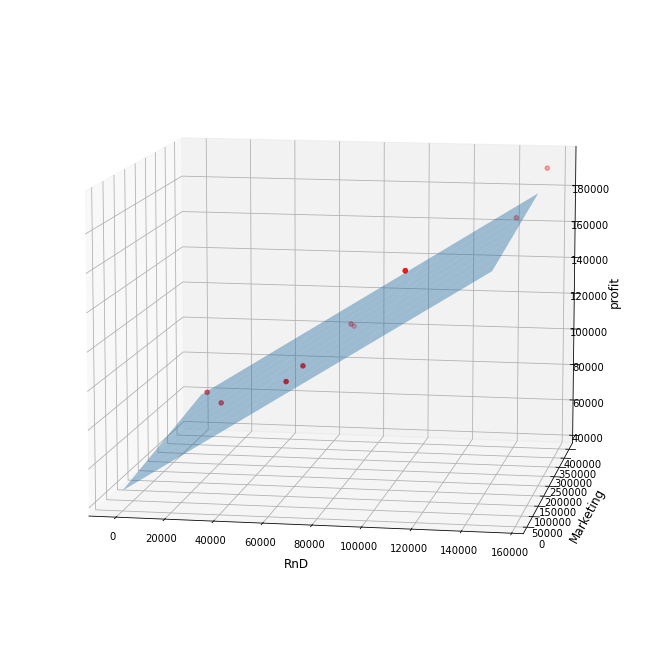

In [ ]:
# Visualize the results
xs, ys = np.meshgrid(range(0,int(X_test.max()[0]),50000), range(0,int(X_test.max()[1]),50000))
zs = xs*coefs[0]+ys*coefs[1]+intercept

fig = plt.figure(figsize=(12,12)).gca(projection='3d')
fig.scatter(X_test['R&D Spend'],X_test['Marketing Spend'],y_test,color='r')
fig.plot_surface(xs,ys,zs, alpha=0.4) # regression plane

fig.set_xlabel('RnD', fontsize=12,labelpad=10)
fig.set_ylabel('Marketing', fontsize=12,labelpad=10)
fig.set_zlabel('profit', fontsize=12,labelpad=10)
fig.view_init(elev=10, azim=-80)